In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
archivo = "./StudentPerformanceFactors.csv"
student_performance = pd.read_csv(archivo)
student_performance.shape

(6607, 20)

In [3]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
student_performance.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Las siguientes variables poseen datos faltantes:
- Distance_from_Home
- Parental_Education_Level
- Teacher_Quality

Tambien se observa que la variable "Exam_Score" posee un valor inusual de 101. Se procede a realizar una limpieza de esos datos


In [5]:
print(student_performance['Distance_from_Home'].value_counts(dropna=False),"\n")
print(student_performance["Parental_Education_Level"].value_counts(dropna=False),"\n")
print(student_performance["Teacher_Quality"].value_counts(dropna=False))

Distance_from_Home
Near        3884
Moderate    1998
Far          658
NaN           67
Name: count, dtype: int64 

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
NaN               90
Name: count, dtype: int64 

Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64


In [6]:
student_performance["Teacher_Quality"] = student_performance["Teacher_Quality"].fillna("Medium")
student_performance["Parental_Education_Level"] = student_performance["Parental_Education_Level"].fillna("High School")
student_performance["Distance_from_Home"] = student_performance["Distance_from_Home"].fillna("Moderate")
student_performance["Exam_Score"] = student_performance["Exam_Score"].replace(101,100)

Hipotesis #1

Si la calidad del profesor es alta, la nota promedio de los alumnos aumentará

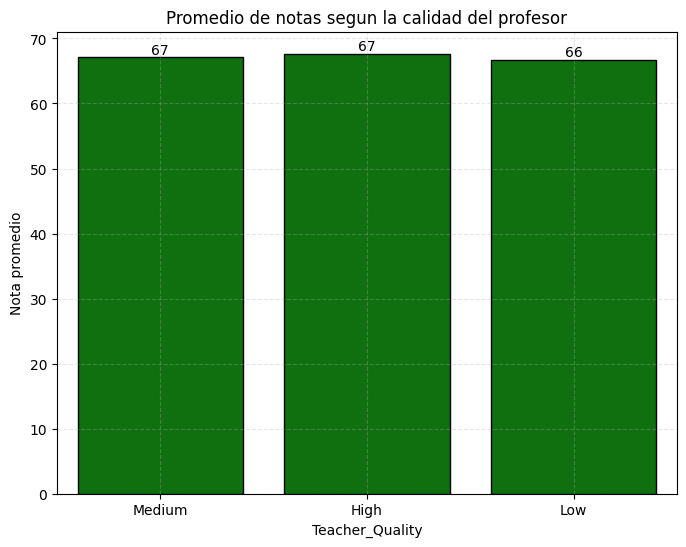

In [25]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=student_performance, x="Teacher_Quality", y="Exam_Score",estimator="mean", errorbar=None ,color="green",edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
plt.title("Promedio de notas segun la calidad del profesor")
plt.ylabel("Nota promedio")
plt.grid(linestyle="--",alpha=0.30)

plt.show()

Se concluye con que la nota no se ve influenciada por la calidad del profesor

Hipotesis #2

A mayor horas de estudios semanales, mayor sera la nota promedio en los examenes

Correlacion entre resultado de examen y horas de estudio: 0.45


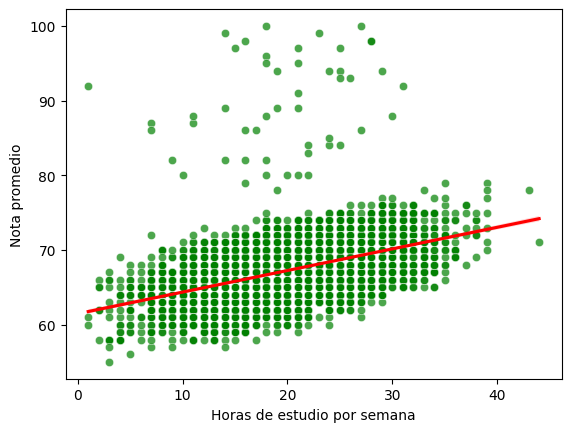

In [8]:
correlacion = student_performance['Exam_Score'].corr(student_performance['Hours_Studied'])
print(f"Correlacion entre resultado de examen y horas de estudio: {correlacion:.2f}")
sns.scatterplot(data=student_performance,x='Hours_Studied',y='Exam_Score',alpha=0.7, color='green')
sns.regplot(data=student_performance,x='Hours_Studied',y='Exam_Score',scatter=False, color='red' )
plt.xlabel('Horas de estudio por semana')
plt.ylabel('Nota promedio')
plt.show()

Se concluye con que existe una correlacion moderada positiva entre las horas de estudio semanales y la nota promedio

Hipotesis #3

Los alumnos en escuelas privadas tienen notas promedio mas altas que los alumnos de escuelas publicas

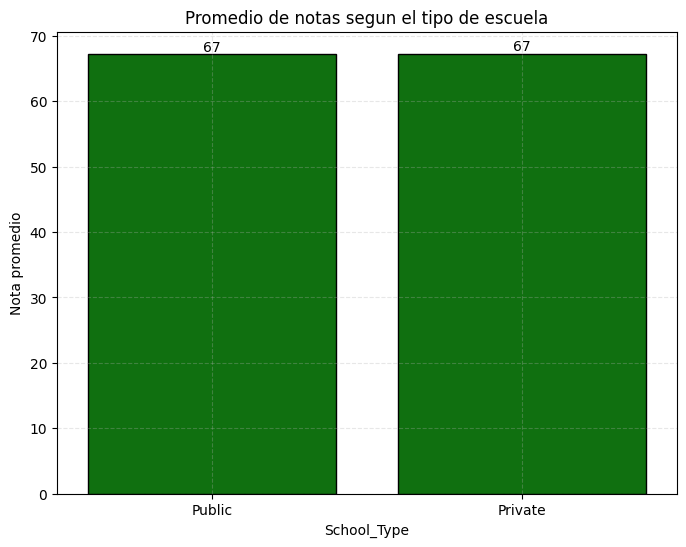

In [23]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=student_performance, x="School_Type", y="Exam_Score",estimator="mean", errorbar=None ,color="green",edgecolor="black")
for bar in ax.patches:
    ax.annotate(text=int(bar.get_height()),xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),ha="center",va="bottom",fontsize=10,color="black")
plt.title("Promedio de notas segun el tipo de escuela")
plt.ylabel("Nota promedio")
plt.grid(linestyle="--",alpha=0.30)

plt.show()

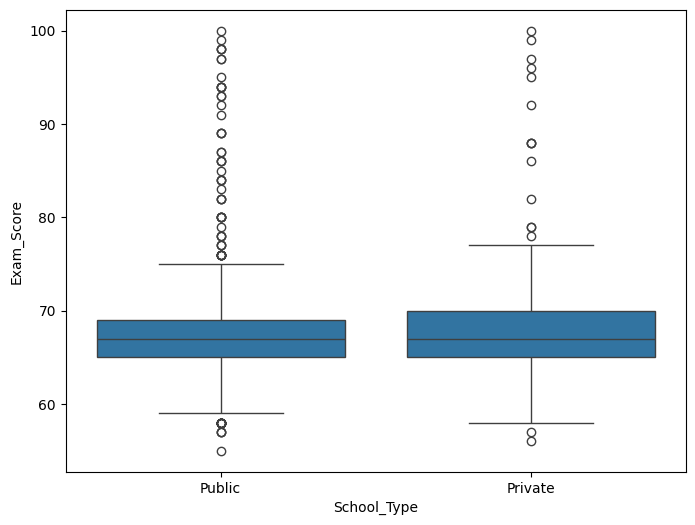

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(data=student_performance, x='School_Type', y='Exam_Score')
plt.show()

In [50]:
print("Estadisticas de las notas de las escuelas publicas")
print(student_performance.loc[student_performance["School_Type"] == "Public"]['Exam_Score'].describe())
print("Estadisticas de las notas de las escuelas privadas")
print(student_performance.loc[student_performance["School_Type"] == "Private"]['Exam_Score'].describe())

Estadisticas de las notas de las escuelas publicas
count    4598.000000
mean       67.212701
std         3.906844
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64
Estadisticas de las notas de las escuelas privadas
count    2009.000000
mean       67.287705
std         3.848844
min        56.000000
25%        65.000000
50%        67.000000
75%        70.000000
max       100.000000
Name: Exam_Score, dtype: float64


Se observa que:

 1- La nota promedio de los estudiantes de escuelas privadas y publicas es practicamente la misma.
 
 2- Las notas de las escuelas privadas estan levemente mas dispersas que el de las escuelas publicas.

 3- Tanto escuelas publicas como privadas poseen outliers
 
Conclusion: Segun lo analizado, el tipo de escuela no influye significativamente en la nota obtenida.

En base a lo observado en la hipotesis #3, se buscara analizar los outliers de las escuelas publicas

In [52]:
alumnos_escuela_publica = student_performance.loc[student_performance["School_Type"] == "Public"]

In [54]:
#Quiero encontrar los outliers del limite inferior para ello se calcula el rango intercuartilico
q1 = student_performance["Exam_Score"].quantile(0.25)
q3 = student_performance["Exam_Score"].quantile(0.75)
iqr = q3 - q1
#Y calculo el limite inferior
limite_inferior = q1 - 1.5*iqr